In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [ ]:
class SARIMAX_Model:
  def __init__(self,order=(1,1,1), seasonal_order=(1,1,1,12), exog=None):
    """
    Inicializa o modelo SARIMAX.

    """
    self.order = order
    self.seasonal_order = seasonal_order
    self.exog = exog
    self.model = None
    self.results = None

  def train(self,train_data):
    """
    Treina o modelo SARIMAX com os dados de treinamento fornecidos.

    """
    self.model = SARIMAX(train_data, order=self.order,
                         seasonal_order=self.seasonal_order,
                         exog=self.exog)
    self.results = self.model.fit(disp=False)
    print("Modelo treinado com sucesso!")


  def predict(self,steps=12,exog_future=None):
    """
    Realiza previsões usando o modelo treinado.

    """
    if self.results is None:
      raise ValueError("O modelo não foi treinado.")
    return self.results.get_forecast(steps=steps,exog=exog_future)

  def evaluate(self,test_data):
    """
    Avalia o desempenho do modelo usando os dados de teste fornecidos.

    """
    if self.results is None:
      raise ValueError("O modelo não foi treinado.")
    predctions = self.results.forecast(steps=len(test_data))
    mse = mean_squared_error(test_data,predctions)
    print(f"Erro Quadrático Médio (MSE): {mse}")
    return mse


In [ ]:
# Exemplo de uso
if __name__ == "__main__":
    # Criando dados fictícios
    np.random.seed(42)
    date_rng = pd.date_range(start='2020-01-01', periods=36, freq='M')
    data = pd.Series(np.random.randn(36).cumsum(), index=date_rng)

<ipython-input-4-2d359d041c12>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_rng = pd.date_range(start='2020-01-01', periods=36, freq='M')


In [ ]:
# Separando dados de treino e teste
train, test = data[:24], data[24:]

# Criando e treinando o modelo
model = SARIMAX_Model(order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model.train(train)

# Fazendo previsões
predictions = model.predict(steps=len(test))

# Avaliando o modelo
model.evaluate(test)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Modelo treinado com sucesso!
Erro Quadrático Médio (MSE): 26.571131044568176


26.571131044568176

Código refatorado

In [ ]:
#Ao invés de ter todo o modelo em uma classe, separar as funcionalidade em classes diferentes (treino,previsao...)
from abc import ABC, abstractmethod

class TimeSeriesModel(ABC):
  @abstractmethod
  def fit(self,data):
    pass

  @abstractmethod
  def predict(self,steps,exog=None):
    pass

class SARIMAXAdapter(TimeSeriesModel):
  def __init__(self,order=(1,1,1), seasonal_order=(1,1,1,12), exog=None):
    """
    Inicializa o modelo SARIMAX.

    """
    self.model = SARIMAX(order=order,seasonal_order=seasonal_order,exog=exog)
    self.results = None

  def fit(self,data):
    self.results.fit(disp=False)

  def predict(self,steps,exog=None):
    return self.result.get_forecast(steps=steps,exog=exog)

class SARIMAXModelTrainer:
  def train(self,model,train_data):
    model.model = SARIMAX(train_data,
                          order=model.order,
                          seasonal_order=model.seasonal_order,
                          exog=model.exog)
    model.results = model.model.fit(disp=False)
    print("Modelo treinado com sucesso")

class SARIMAXModelPredictor:
  def predict(self,model,steps=12,exog_future=None):
    if model.results is None:
      raise ValueError("O modelo não foi treinado.")
    return model.results.get_forecast(steps=steps,exog=exog_future)

class SARIMAXModelEvaluator:
  def evaluate(self,model,test_data):
    if model.results is None:
      raise ValueError("O modelo não foi treinado.")
    predictions = model.results.forecast(steps=len(test_data))
    mse = mean_squared_error(test_data,predictions)
    print(f"Erro Quadrático Médio (MSE): {mse}")
    return mse

Exemplo de Código

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod

# Interfaces para Polimorfismo e Abstração
class ModeloDeSerieTemporal(ABC):
    @abstractmethod
    def treinar(self, dados_treinamento):
        pass

    @abstractmethod
    def prever(self, passos, dados_exogenos=None):
        pass

class Avaliador(ABC):
    @abstractmethod
    def avaliar(self, modelo, dados_teste):
        pass

# Classes de Dados
class DadosDeTreinamento:
    def __init__(self, dados):
        self.dados = dados

class DadosDeTeste:
    def __init__(self, dados):
        self.dados = dados

class Previsoes:
    def __init__(self, valores):
        self.valores = valores

# Classe Modelo SARIMAX
class ModeloSARIMAX(ModeloDeSerieTemporal):
    def __init__(self, ordem, ordem_sazonal, dados_exogenos=None):
        self.ordem = ordem
        self.ordem_sazonal = ordem_sazonal
        self.dados_exogenos = dados_exogenos
        self._resultados = None  # Atributo privado

    def treinar(self, dados_treinamento):
        modelo = SARIMAX(dados_treinamento.dados, order=self.ordem, seasonal_order=self.ordem_sazonal, exog=self.dados_exogenos)
        self._resultados = modelo.fit(disp=False)

    def prever(self, passos, dados_exogenos=None):
        if self._resultados is None:
            raise ValueError("O modelo não foi treinado.")
        previsoes = self._resultados.get_forecast(steps=passos, exog=dados_exogenos)
        return Previsoes(valores=previsoes.predicted_mean)

# Classe Avaliador de Modelo
class AvaliadorMSE(Avaliador):
    def avaliar(self, modelo, dados_teste):
        previsoes = modelo.prever(len(dados_teste.dados))
        mse = mean_squared_error(dados_teste.dados, previsoes.valores)
        return mse

# Classe Gerador de Gráficos
class GeradorDeGraficos:
    def gerar_grafico_de_linha(self, previsoes, dados_teste=None):
        plt.figure(figsize=(12, 6))
        plt.plot(previsoes.valores, label='Previsões')
        if dados_teste:
            plt.plot(dados_teste.dados, label='Dados de Teste')
        plt.legend()
        plt.show()

    def salvar_grafico(self, previsoes, nome_arquivo="previsoes.png", dados_teste=None):
        plt.figure(figsize=(12, 6))
        plt.plot(previsoes.valores, label='Previsões')
        if dados_teste:
            plt.plot(dados_teste.dados, label='Dados de Teste')
        plt.legend()
        plt.savefig(nome_arquivo)

# Exemplo de Uso
dados_treinamento_np = np.random.randn(100)
dados_teste_np = np.random.randn(20)

dados_treinamento = DadosDeTreinamento(dados_treinamento_np)
dados_teste = DadosDeTeste(dados_teste_np)

modelo_sarimax = ModeloSARIMAX(ordem=(1, 1, 1), ordem_sazonal=(1, 1, 1, 12))
modelo_sarimax.treinar(dados_treinamento)

previsoes = modelo_sarimax.prever(passos=len(dados_teste.dados))

avaliador = AvaliadorMSE()
mse = avaliador.avaliar(modelo_sarimax, dados_teste)
print(f"MSE: {mse}")

grafico_gerador = GeradorDeGraficos()
grafico_gerador.gerar_grafico_de_linha(previsoes, dados_teste)
grafico_gerador.salvar_grafico(previsoes, dados_teste=dados_teste)

Explicações e Decisões:

Interfaces e Herança:
ModeloDeSerieTemporal e Avaliador são interfaces, permitindo polimorfismo.
ModeloSARIMAX implementa ModeloDeSerieTemporal.
AvaliadorMSE implementa Avaliador.
Encapsulamento:
_resultados em ModeloSARIMAX é privado, protegendo os resultados do treinamento.
Abstração:
Os detalhes complexos do SARIMAX são encapsulados nas classes ModeloSARIMAX, AvaliadorMSE, e GeradorDeGraficos, fornecendo métodos simples como treinar, prever, avaliar, gerar_grafico_de_linha, e salvar_grafico.
Polimorfismo:
Se você quiser adicionar outros modelos de séries temporais (ARIMA, Prophet, etc.), basta criar novas classes que implementem ModeloDeSerieTemporal.
Da mesma forma, diferentes métricas de avaliação podem ser adicionadas implementando Avaliador.
Classes de Dados:
As classes DadosDeTreinamento, DadosDeTeste, e Previsoes encapsulam os dados, facilitando a passagem de dados entre os objetos.

Melhores Práticas de Testes Unitários
- **Escreva Testes Antes do Código (TDD)**: Escrever testes antes do código ajuda a definir os requisitos e a garantir que o código seja testável.
- **Mantenha os Testes Isolados:** Evite dependências externas (bancos de dados, APIs) nos testes unitários. Use mocks ou stubs para simular essas dependências.
- **Teste Casos de Borda:** Teste casos extremos e entradas inválidas para garantir que o código seja robusto.
- **Mantenha os Testes Rápidos:** Testes unitários devem ser rápidos para serem executados com frequência.
- **Mantenha os Testes Simples:** Testes complexos podem ser difíceis de manter e entender.



Regressão utilizando OOP e SOLID

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod

class DataLoader:
  def load_data(self):
    breast_cancer = load_breast_cancer()
    data = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
    data['target'] = breast_cancer.target
    return data

class DatePreprocessor:
  def preprocess_data(self,data,test_size=0.2,random_state=42):
    X = data.drop('target',axis=1)
    y = data['target']
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_size, random_state=random_state)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled,X_test_scaled,y_train,y_test

class RegressionModel(ABC):
  @abstractmethod
  def train(self,X_train, y_train):
    pass

  @abstractmethod
  def predict(self,X_test):
    pass

class LinearRegressionModel(RegressionModel):
  def __init__(self):
    self.model = LinearRegression()

  def train(self,X_train,y_train):
    self.model.fit(X_train,y_train)

  def predict(self,X_test):
    return self.model.predict(X_test)

class ModelTrainer:
  def train_model(self,model, X_train, y_train):
    model.train(X_train, y_train)

class ModelEvaluator:
  def evaluate_model(self,model,X_test,y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    print(f"Erro Quadrático Médio (MSE): {mse}")
    return mse

class GraphGenerator:
  def generate_scatter_plot(self,y_test,y_pred):
      plt.figure(figsize=(10, 6))
      plt.scatter(y_test, y_pred)
      plt.xlabel("Valores Reais")
      plt.ylabel("Valores Previstos")
      plt.title("Valores Reais vs. Valores Previstos")
      plt.show()


Erro Quadrático Médio (MSE): 0.06410886247029458


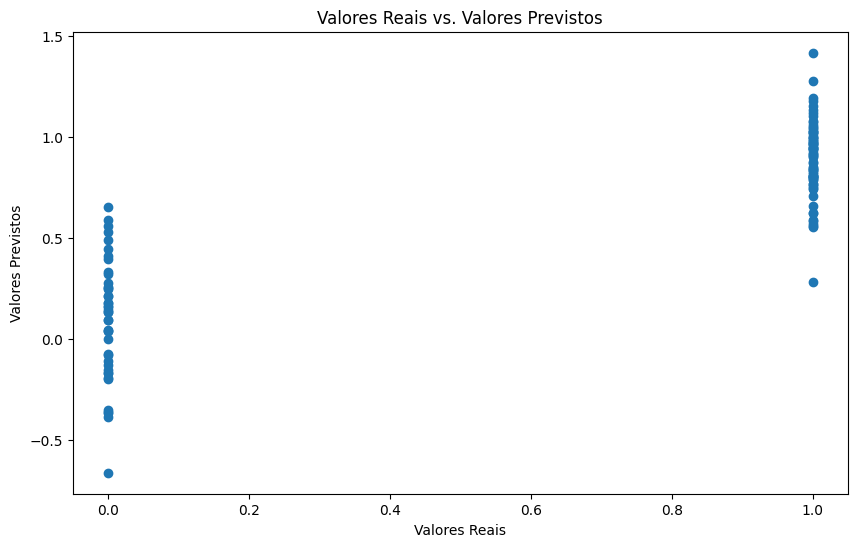

In [ ]:
# Exemplo de Uso
data_loader = DataLoader()
data = data_loader.load_data()

data_preprocessor = DatePreprocessor()
X_train, X_test, y_train, y_test = data_preprocessor.preprocess_data(data)

regression_model = LinearRegressionModel()

model_trainer = ModelTrainer()
model_trainer.train_model(regression_model, X_train, y_train)

model_evaluator = ModelEvaluator()
model_evaluator.evaluate_model(regression_model, X_test, y_test)

graph_generator = GraphGenerator()
y_pred = regression_model.predict(X_test)
graph_generator.generate_scatter_plot(y_test, y_pred)

In [ ]:
import unittest
import numpy as np
from regression_model import (
    DataLoader,
    DataPreprocessor,
    LinearRegressionModel,
    ModelTrainer,
    ModelEvaluator,
)

class TestRegression(unittest.TestCase):
    def setUp(self):
        self.data_loader = DataLoader()
        self.data = self.data_loader.load_data()
        self.data_preprocessor = DataPreprocessor()
        self.X_train, self.X_test, self.y_train, self.y_test = self.data_preprocessor.preprocess_data(self.data)
        self.regression_model = LinearRegressionModel()
        self.model_trainer = ModelTrainer()
        self.model_evaluator = ModelEvaluator()

    def test_data_loader(self):
        self.assertIsNotNone(self.data)
        self.assertEqual(len(self.data), 569)

    def test_data_preprocessor(self):
        self.assertIsNotNone(self.X_train)
        self.assertIsNotNone(self.X_test)
        self.assertIsNotNone(self.y_train)
        self.assertIsNotNone(self.y_test)
        self.assertEqual(len(self.X_train), 455)
        self.assertEqual(len(self.X_test), 114)

    def test_linear_regression_model(self):
        self.model_trainer.train_model(self.regression_model, self.X_train, self.y_train)
        y_pred = self.regression_model.predict(self.X_test)
        self.assertIsNotNone(y_pred)
        self.assertEqual(len(y_pred), 114)

    def test_model_evaluator(self):
        self.model_trainer.train_model(self.regression_model, self.X_train, self.y_train)
        mse = self.model_evaluator.evaluate_model(self.regression_model, self.X_test, self.y_test)
        self.assertIsInstance(mse, float)
        self.assertGreaterEqual(mse, 0)

if __name__ == '__main__':
    unittest.main()

Explicações
- setUp(self): Este método é executado antes de cada método de teste. Ele é usado para configurar os dados e objetos necessários para os testes.
- test_data_loader(self): Este método testa se o carregador de dados está funcionando corretamente. Ele verifica se os dados foram carregados e se o número de linhas está correto.
- test_data_preprocessor(self): Este método testa se o pré-processador de dados está funcionando corretamente. Ele verifica se os dados de treino e teste foram criados e se o número de linhas está correto.
- test_linear_regression_model(self): Este método testa se o modelo de regressão linear está funcionando corretamente. Ele verifica se o modelo foi treinado e se as previsões foram geradas.
- test_model_evaluator(self): Este método testa se o avaliador de modelo está funcionando corretamente. Ele verifica se o MSE foi calculado e se é um valor válido.
- Executando os Testes
Abra o Terminal ou Prompt de Comando:

- No Windows, você pode usar o "Prompt de Comando" ou o "PowerShell".
No macOS ou Linux, você pode usar o "Terminal".
Navegue até o Diretório do Projeto:

- Use o comando cd para navegar até o diretório onde você salvou os arquivos regression_model.py e test_regression.py.
Execute os Testes:

- Execute o comando python -m unittest test_regression.py.
Arquivo de Testes
- O arquivo de testes (test_regression.py) pode ficar no mesmo diretório do seu código principal (regression_model.py).
Não é necessário colocá-lo em uma pasta separada no Anaconda. O unittest encontrará e executará os testes automaticamente.
- É comum criar uma pasta chamada "tests" para organizar os testes, dentro desta pasta você pode deixar todos os arquivos de testes, e dentro do código principal, você pode chamar a pasta de testes para realizar os testes.
- Dicas Adicionais
- Use nomes descritivos para os métodos de teste para facilitar a identificação de falhas.
- Teste casos de borda e entradas inválidas para garantir que seu código seja robusto.
- Execute os testes com frequência para detectar erros precocemente.
